In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [2]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
rider_data = pd.io.json.json_normalize(data)
rider_data.signup_date = rider_data.signup_date.apply(lambda x: pd.Timestamp(x))
rider_data.last_trip_date = rider_data.last_trip_date.apply( lambda x: pd.Timestamp(x))
rider_data['counter'] = 1
rider_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,counter
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [3]:
rider_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,counter
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,1.0
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,0.0
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,1.0
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,1.0
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,1.0
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.0


In [4]:
#based on this we will fill the missing Na values from 'of driver' with 'bydriver'
(rider_data.avg_rating_of_driver/rider_data.avg_rating_by_driver).describe()

count    41744.000000
mean         0.975162
std          0.226796
min          0.200000
25%          0.914894
50%          1.000000
75%          1.000000
max          5.000000
dtype: float64

From this data we can see that there are about 300 Nan Values in avg_rating_by_driver (we can probably remove these data points without much harm done). However with the avg_rating_of_driver we would have to remove over 8000 datapoints which is almost 20% of our total data. We we will look to fill this data using the 'by driver' as shown above

In [5]:
rider_data = rider_data.dropna(subset=['avg_rating_by_driver'])
rider_data.avg_rating_of_driver = rider_data.avg_rating_of_driver.fillna(rider_data.avg_rating_by_driver)
rider_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,counter
count,49799.000000,49799.000000,49799.000000,49799.000000,49799.000000,49799.000000,49799.000000,49799.0
mean,5.795332,4.778158,4.631593,1.074396,8.821665,2.285166,60.957132,1.0
std,5.665794,0.446652,0.620770,0.220694,19.860920,3.798589,37.017558,0.0
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,1.0
50%,3.890000,5.000000,5.000000,1.000000,0.000000,1.000000,66.700000,1.0
75%,6.940000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000,1.0
max,129.890000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.0


In [6]:
#checking non numerical data columns for nans
print('City_unique', rider_data.city.unique())
print('Phone unique', rider_data.phone.unique())
rider_data.phone.describe(), len(rider_data) 

City_unique ["King's Landing" 'Astapor' 'Winterfell']
Phone unique ['iPhone' 'Android' None]


(count      49406
 unique         2
 top       iPhone
 freq       34446
 Name: phone, dtype: object, 49799)

In [7]:
#only 400 nan values in phone so we wil drop na from this list from the data
rider_data = rider_data.dropna(subset=['phone'])
rider_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,counter
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [8]:
rider_data.last_trip_date.max() 
#we will make the assumption that this is the date that the data was pulled. Active users will be considers based on 30 prior to
# this date.

Timestamp('2014-07-01 00:00:00')

In [9]:
today = rider_data.last_trip_date.max() 

In [10]:
#get active
rider_data['active'] = rider_data.last_trip_date
rider_data.active = rider_data.active.apply(lambda x: (today - x).days <= 30)
rider_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,counter,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1,False


In [11]:
percentage_retained = rider_data.active.value_counts()[1]/rider_data.active.value_counts().sum()
percentage_retained

0.37718090920131159

Questions about the data that I think are the most important.
    - does phone matter?
    - rating of/by driver is important?
    - did it matter to take Ultimate black in the beginning
    - did the amount of trips/miles in the first few days affect retention
    - does average driving distance affect retention?
    - does weekday percentage matter?
    - How do the surge percentages and avg surge affect the user
    - how does rating by driver affect retention

Questions too look into later for thoroughness:
    - City
    - signup date
 
Will use t-test for driver ratings, driving distance and amount of miles and trips/dist in the first few days.

Chi-squared will help us analyze the phone question

In [12]:
#create data split for active and inactive users
active = rider_data[rider_data.active]
inactive = rider_data[rider_data.active == False]

In [217]:
#function for showing hists and p-values between bots and humans
def HistnP(s, bins):
    '''str argument is the column value to be evaluated
    bins sets the bins of the histograms'''
    plt.subplot(211)
    plt.title('Histogram of {}s'.format(s))
    plt.hist(active[s], color='b', range=(0,bins), bins=100)
    plt.legend('Active Users')
    plt.subplot(212)
    plt.hist(inactive[s], color='r', range=(0,bins), bins=100)
    plt.legend('Inactive Users')
    plt.xlabel('Frequency of {}'.format(s))
    plt.ylabel('Number of Users')
    plt.show()
    print ('p-value: ', stats.ttest_ind(active[s], inactive[s])[1])

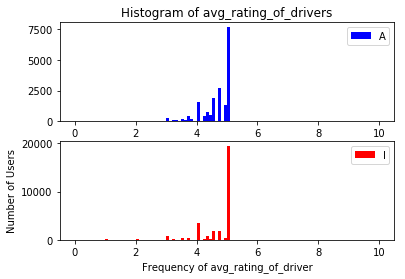

p-value:  5.71572002843e-09


In [218]:
HistnP('avg_rating_of_driver', 10)

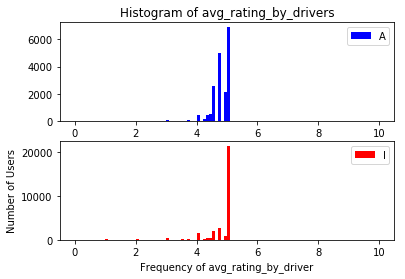

p-value:  4.56166264395e-09


In [219]:
HistnP('avg_rating_by_driver',10)

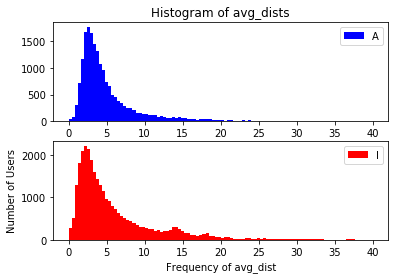

p-value:  1.65947545568e-96


In [220]:
HistnP('avg_dist', 40)

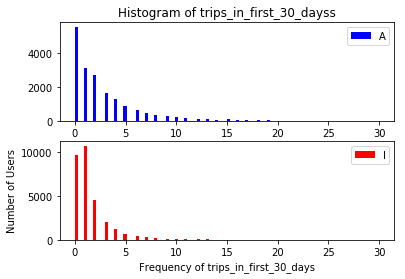

p-value:  0.0


In [221]:
HistnP('trips_in_first_30_days', 30)

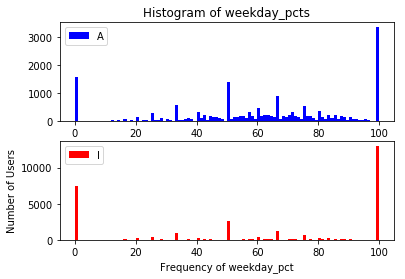

p-value:  0.0343681849033


In [222]:
HistnP('weekday_pct', 100)

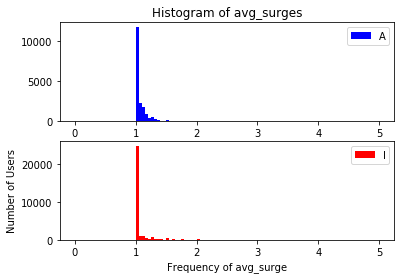

p-value:  0.445360283992


In [223]:
HistnP('avg_surge',5)

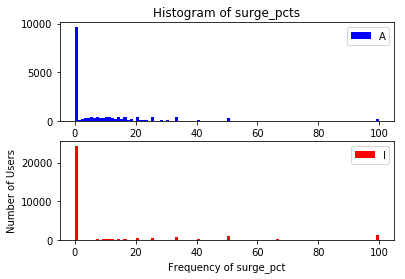

p-value:  0.00932106233317


In [224]:
HistnP('surge_pct', 100)

C:\Users\jcbam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Chi-squared: 2557.1914630590604, P-value: 0.0


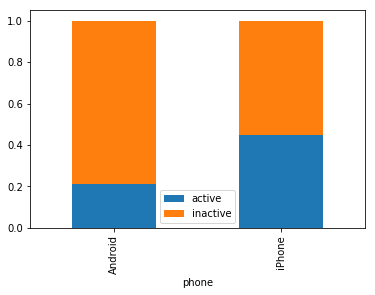

In [225]:
phone_count = rider_data.groupby('phone').sum()
phone_data = phone_count[['counter', 'active']]
phone_data['inactive'] = phone_data.counter - phone_data.active
chi2, p, dof, expect = chi2_contingency(phone_data.drop('counter', axis=1).as_matrix())
print("Chi-squared: {}, P-value: {}".format(chi2,p))
phone_percent = (phone_data.T/phone_data.counter).T
phone_percent.drop('counter', axis=1).plot.bar(stacked=True)
plt.show()

Chi-squared: 2080.552960189688, P-value: 0.0


C:\Users\jcbam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


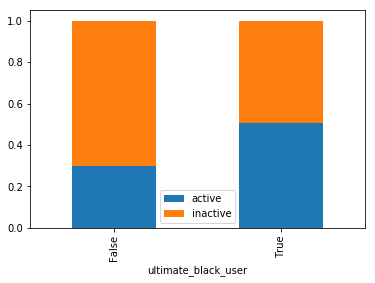

In [174]:
black_count = rider_data.groupby('ultimate_black_user').sum()
black_data = black_count[['counter', 'active']]
black_data['inactive'] = black_data.counter - black_data.active
chi2, p, dof, expect = chi2_contingency(black_data.drop('counter', axis=1).as_matrix())
print("Chi-squared: {}, P-value: {}".format(chi2,p))
black_percent = (black_data.T/black_data.counter).T
black_percent.drop('counter', axis=1).plot.bar(stacked=True)
plt.show()

At the End of our EDA we find that most of the given features of the data are useful for prediction except for the average number of surges. We will want to look into a few other features such as the location of sign up and sign up date to see if promotions may have caused higher user retention. Then we'll want to explore more feature creation such as total distance traveled in the first 30 days.

Start Machine Learning: 
1. Separate Variables into X and y
2. Create train and test sets
3. Test on different algorithms

Our primary algorithm of interest is a random forest. Using decision trees tends to be a good way of tackling classification problems such as this one and a random forest approach removes many of the drawbacks associated with decision trees. Also considering that there are a small number of features and iterative improvement isn't a concern at this time, Random Forest seems like the best algorithm to use. However we will also consider other algorithms such as SVM, logistic regression and Nearest Neighbors.

In [13]:
#create test data
X = rider_data.drop(['active','avg_surge','city','last_trip_date','signup_date'], axis=1)
X.phone = X.phone.map({'iPhone':1, 'Android':0})
y = rider_data.active

#train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
def model_report(model):
    '''Output Classification report for the given model'''
    model.fit(Xtrain, ytrain)
    report = classification_report(ytest, model.predict(Xtest))
    print(report)

In [240]:
param_grid = {'n_estimators':range(5,15)}
forest = GridSearchCV(RandomForestClassifier(), param_grid)
model_report(forest)

             precision    recall  f1-score   support

      False       0.77      0.81      0.79      9238
       True       0.65      0.59      0.62      5584

avg / total       0.72      0.73      0.72     14822



In [15]:
model_report(SVC())

             precision    recall  f1-score   support

      False       0.77      0.86      0.81      9238
       True       0.71      0.58      0.64      5584

avg / total       0.75      0.75      0.75     14822



In [ ]:
param_grid = {'C':[0.1, 1, 10]}
svc = GridSearchCV(SVC(), param_grid)
model_report(svc)

In [245]:
param_grid = {'C':range(1, 10), 'intercept_scaling':[1,2,3]}
logreg = GridSearchCV(LogisticRegression(), param_grid)
model_report(logreg)

             precision    recall  f1-score   support

      False       0.71      0.84      0.77      9238
       True       0.62      0.43      0.51      5584

avg / total       0.68      0.69      0.67     14822



In [244]:
param_grid = {'n_neighbors':range(1,15)}
knn = GridSearchCV(KNeighborsClassifier(), param_grid)
model_report(knn)

             precision    recall  f1-score   support

      False       0.76      0.86      0.81      9238
       True       0.71      0.56      0.62      5584

avg / total       0.74      0.75      0.74     14822

